# MAEZAR ABDILLAH
# 2109106029
# A2 2021

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
datasplit = pd.read_csv("covid_19_indonesia_time_series_all.csv")
datasplit.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


# MEMBAGI 2 DATA SPLIT

In [3]:
x = datasplit.iloc[:, :-1]
y = datasplit.iloc[:, -1]

# training size 70:30

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test:", y_test.shape)

x_train : (22275, 37)
x_test : (9547, 37)
y_train : (22275,)
y_test: (9547,)


# normalisasi 1 atribut

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalisasi atribut location level

In [12]:
datasplit["Total Cases"]= datasplit["Total Cases"].astype("object")
norm = scaler.fit_transform(datasplit[["Total Cases"]])
datanormal = pd.DataFrame(norm)
datanormal.head(10)

,0
0,5.932825e-06
1,6.245079e-06
2,1.561270e-07
3,0.000000e+00
4,6.557333e-06
5,1.561270e-07
6,0.000000e+00
7,0.000000e+00
8,6.869587e-06
9,1.561270e-07


# visualisasi normalisasi data

In [13]:
import matplotlib.pyplot as plt

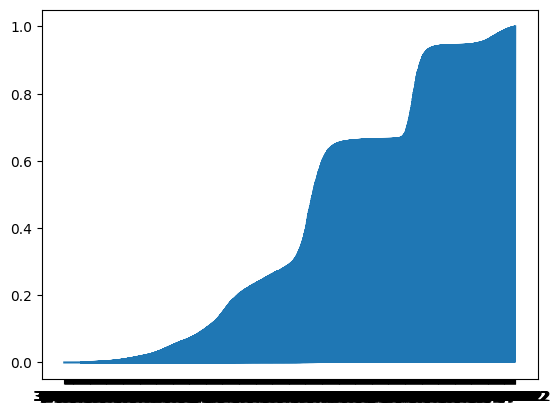

In [14]:
plt.plot(datasplit.Date, datanormal[0])
plt.show()

# standarisasi data

In [20]:
from sklearn.preprocessing import StandardScaler

# sebelum standarisasi

In [18]:
sebelum = pd.DataFrame(np.std(datasplit))
sebelum

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,0
New Cases,2.320593e+03
New Deaths,6.413807e+01
New Recovered,2.199844e+03
New Active Cases,1.219494e+03
Total Cases,6.264336e+05
Total Deaths,1.769345e+04
Total Recovered,5.958443e+05
Total Active Cases,2.853696e+04
City or Regency,NaN
Total Regencies,6.835866e+01


# standarisasi data

In [22]:
ss = StandardScaler()
Standar = ss.fit_transform(
    datasplit[['Total Cases', 'Total Deaths', 'Total Recovered', 'New Cases', 'New Deaths']]
)
print("nilai setelah standarisasi : ",np.nanstd(Standar))
print("mean setelah standarisasi : ",np.nanmean(Standar))
print("nilai standarisasi :")
std_data = pd.DataFrame(Standar)
std_data.head(5)

nilai setelah standarisasi :  1.0
mean setelah standarisasi :  -6.430655141063065e-18
nilai standarisasi :


,0,1,2,3,4
0,-0.254474,-0.256861,-0.250378,-0.172504,-0.154676
1,-0.254471,-0.256861,-0.250378,-0.172504,-0.154676
2,-0.254533,-0.257991,-0.250504,-0.172504,-0.154676
3,-0.254535,-0.257991,-0.250502,-0.172935,-0.154676
4,-0.254468,-0.256861,-0.250378,-0.172504,-0.154676


# visualisasi std data

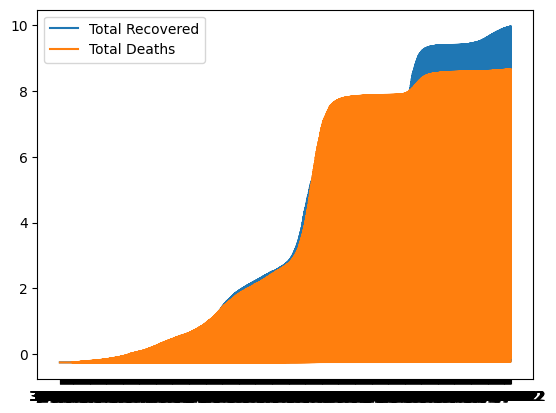

In [25]:
plt.plot(datasplit.Date, std_data[0], label = "Total Recovered")
plt.plot(datasplit.Date, std_data[1], label = "Total Deaths")
plt.legend()
plt.show()

# data cleaning

In [26]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [27]:
#cek nilai null
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [28]:
# cek letak nilai null
df[df.isnull().any(axis = 1)]

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


# menangani nilai null

In [36]:
# median
df['Total Urban Villages'] = df['Total Urban Villages'].fillna(df['Total Urban Villages'].median())
df.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages               0
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [37]:
# modus
df['Total Rural Villages'] = df['Total Rural Villages'].fillna(df['Total Rural Villages'].mode()[0])
df.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages               0
Total Rural Villages               0
Area (km2)                         0
Population                         0
Population Density                 0
L

In [39]:
df['Total Cities'] = df['Total Cities'].fillna(df['Total Cities'].mean())
df.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                       0
Total Districts                    0
Total Urban Villages               0
Total Rural Villages               0
Area (km2)                         0
Population                         0
Population Density                 0
L

In [45]:
# ganti tipe data atribut angka
df["New Deaths"]= df["New Deaths"].astype("object")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  object 
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [47]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False)

In [53]:
hot=onehot.fit_transform(df[["Location","Location Level","Province","Time Zone"]])
df_onehot = pd.DataFrame(hot)
df_onehot.head(15)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
